1/1 [==============================] - 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


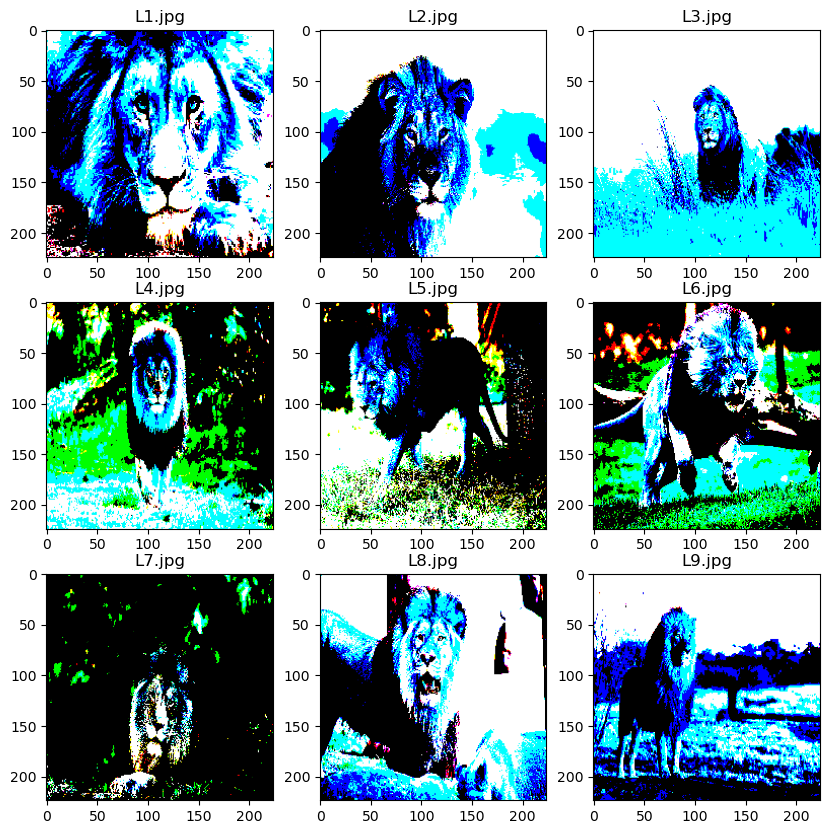

Feature Statistics:
Mean:  [4.11137915e+00 1.40276146e+00 7.31075335e+00 1.16647758e-01
 1.27182779e+01 2.74407482e+00 6.74523890e-01 6.93551826e+00
 1.16234665e+01 1.25598982e-01 2.27035236e+00 4.46469113e-02
 7.99598503e+00 4.33302671e-01 3.40461802e+00 2.09545359e-01
 1.75262916e+00 9.66660261e-01 1.79236978e-01 6.14278972e-01
 1.22602952e+00 8.20822775e-01 2.81248055e-02 2.74804997e+00
 1.53919411e+00 1.04648483e+00 5.25401458e-02 2.00532484e+00
 3.24569798e+00 5.87157393e+00 8.15269184e+00 1.75501120e+00
 1.29136384e+00 2.60877323e+00 8.88765395e-01 8.05123895e-02
 1.25829992e+01 4.08097839e+00 4.07100469e-01 1.36601222e+00
 7.21369600e+00 1.59277952e+00 1.51818156e+00 6.63714838e+00
 1.27819109e+00 1.34934795e+00 2.18327785e+00 3.70771623e+00
 4.41828632e+00 2.44295573e+00 3.80270928e-01 1.50022173e+00
 5.52511156e-01 9.25698757e-01 9.33159173e-01 2.09384656e+00
 8.10826588e+00 9.41131264e-02 3.67578197e+00 9.49744582e-01
 1.57560647e+00 3.29592800e+00 3.61655545e+00 3.15887737e+

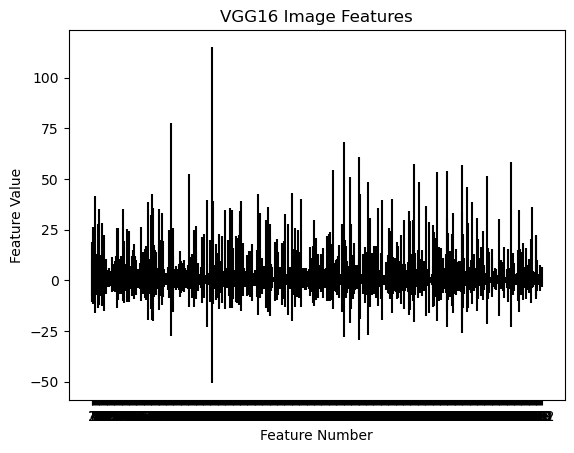

In [27]:
import os
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Set the path to your image directory
path_to_data = "Data"

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Initialize lists to store image features and filenames
features = []
filenames = []

# Loop over each file in the directory
for filename in os.listdir(path_to_data):
    if filename.endswith(".jpg"):
        # Load the image
        img_path = os.path.join(path_to_data, filename)
        img = load_img(img_path, target_size=(224, 224))

        # Preprocess the image
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Extract features using the VGG16 model
        features_vgg = model.predict(x)
        features_vgg = np.reshape(features_vgg, (7*7, 512))

        # Add the features and filename to the lists
        features.append(features_vgg)
        filenames.append(filename)

# Concatenate the features into a single array
features = np.concatenate(features, axis=0)

# Calculate mean and standard deviation of features
mean = np.mean(features, axis=0)
std = np.std(features, axis=0)

# Calculate variance of features
variance = np.var(features, axis=0)

# Display all the preprocessed images
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()
for i, img_path in enumerate(filenames):
    # Load the image
    img = load_img(os.path.join(path_to_data, img_path),
                   target_size=(224, 224))

    # Preprocess the image
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Display the preprocessed image
    axs[i].imshow(x[0])
    axs[i].set_title(img_path)
plt.show()

# Print feature statistics
print("Feature Statistics:")
print("Mean: ", mean)
print("Standard Deviation: ", std)
print("Variance: ", variance)

# Plot features
fig, ax = plt.subplots()
ax.bar(range(len(mean)), mean, yerr=std)
ax.set_xticks(range(len(mean)))
ax.set_xticklabels(range(1, len(mean)+1))
ax.set_xlabel('Feature Number')
ax.set_ylabel('Feature Value')
ax.set_title('VGG16 Image Features')
plt.show()
